In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train_2.csv',
    'x_test_2.csv',
    'y_train_2.csv',
    'y_test_2.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model_high_removed.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.034851
Fold  2 score difference = -0.098243
Fold  1 score difference = -0.065096
Fold  2 score difference = -0.091433
Fold  1 score difference = -0.131938
Fold  2 score difference = -0.052872
Fold  1 score difference = -0.025936
Fold  2 score difference = -0.125785
Fold  1 score difference = -0.174860
Fold  2 score difference = -0.107642
Regression 1 mean score and stdev : 0.079571 + 0.060843
Regression 2 mean score and stdev : 0.170436 + 0.041477
Score difference mean + stdev : -0.090865 + 0.044451
t_value for the current test is -0.690806


mean_score_1 -0.053900821148024955, std 0.12117180546414799
mean_score_2 0.1761631282598066, std 0.07902855326021785
Ttest_relResult(statistic=-123.32710383847643, pvalue=0.0)
P value menor ou igual a 0.05


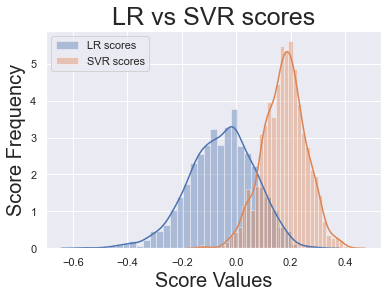

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

lr_svr_comp_scores = [reg1_scores, reg2_scores, 'LR', 'SVR']

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.31034849450754876
0.1630646083467133
0.01758734105141979
0.32515792303273894


## Linear Regression VS XGBoost

In [8]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:58:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.055582
[07:58:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.029537
[07:58:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You hav

mean_score_1 -0.053900821148024955, std 0.12117180546414799
mean_score_2 0.11604227052579516, std 0.09328549420322624
Ttest_relResult(statistic=-95.34288269597147, pvalue=0.0)
P value menor ou igual a 0.05


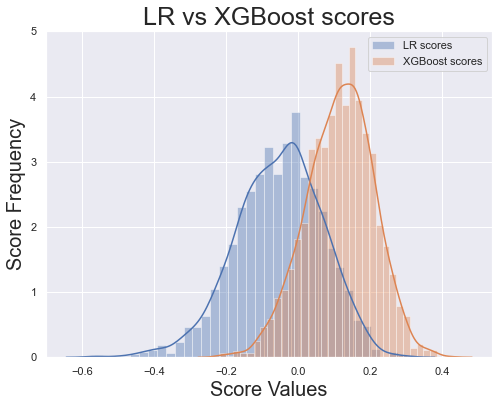

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

lr_xgboost_comp_scores = [reg1_scores, reg2_scores, 'LR', 'XGBoost']


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.31034849450754876
0.1630646083467133
-0.07783283022613686
0.28927708996348794


# Linear Regression vs Neural Network

In [11]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.026771
Fold  2 score difference = -0.038977
Fold  1 score difference = -0.019591
Fold  2 score difference = -0.100566
Fold  1 score difference = -0.125625
Fold  2 score difference = -0.054615
Fold  1 score difference = -0.013231
Fold  2 score difference = -0.050184
Fold  1 score difference = -0.141773
Fold  2 score difference = -0.060269
Regression 1 mean score and stdev : 0.079571 + 0.060843
Regression 2 mean score and stdev : 0.142731 + 0.052928
Score difference mean + stdev : -0.063160 + 0.042463
t_value for the current test is -0.602292


mean_score_1 -0.053900821148024955, std 0.12117180546414799
mean_score_2 0.1384033918893923, std 0.0852813189971799
Ttest_relResult(statistic=-136.15111549084415, pvalue=0.0)
P value menor ou igual a 0.05


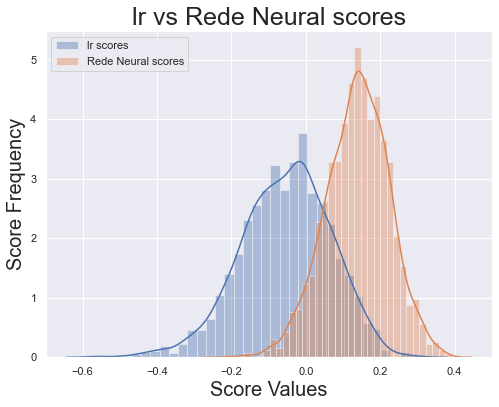

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

lr_nn_comp_scores = [reg1_scores, reg2_scores, 'LR', 'Rede Neural']

plot_score_dist(reg1_scores, reg2_scores, 'lr', 'Rede Neural')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.31034849450754876
0.1630646083467133
-0.0373403539695084
0.3009120110223643


## SVR VS XGboost

In [14]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:58:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.020732
[07:58:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.068705
[07:58:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.1761631282598066, std 0.07902855326021785
mean_score_2 0.11604227052579516, std 0.09328549420322624
Ttest_relResult(statistic=46.545792982700625, pvalue=0.0)
P value menor ou igual a 0.05


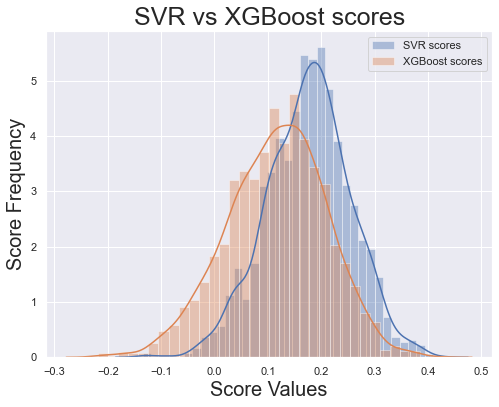

In [15]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

svr_xgboost_comp_scores = [reg1_scores, reg2_scores, 'SVR', 'XGBoost']

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [16]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.01758734105141979
0.32515792303273894
-0.07783283022613686
0.28927708996348794


# SVR vs Neural Network

In [17]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.011911
Fold  2 score difference = 0.061560
Fold  1 score difference = 0.044409
Fold  2 score difference = 0.002092
Fold  1 score difference = 0.016886
Fold  2 score difference = 0.000234
Fold  1 score difference = 0.011356
Fold  2 score difference = 0.076580
Fold  1 score difference = 0.031117
Fold  2 score difference = 0.045086
Regression 1 mean score and stdev : 0.170436 + 0.041477
Regression 2 mean score and stdev : 0.140313 + 0.050359
Score difference mean + stdev : 0.030123 + 0.024726
t_value for the current test is 0.397423


mean_score_1 0.1761631282598066, std 0.07902855326021785
mean_score_2 0.1384033918893923, std 0.0852813189971799
Ttest_relResult(statistic=43.985686226337144, pvalue=3.728679040739766e-306)
P value menor ou igual a 0.05


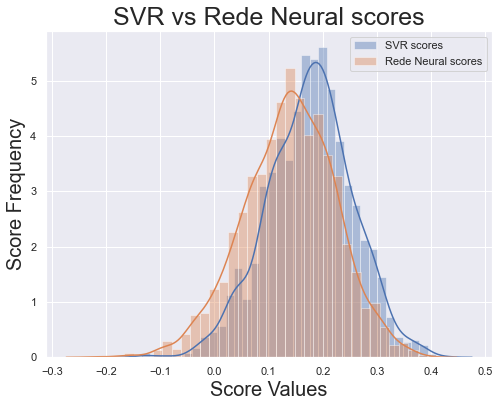

In [18]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

svr_nn_comp_scores = [reg1_scores, reg2_scores, 'SVR', 'Rede Neural']

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'Rede Neural')

In [19]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.01758734105141979
0.32515792303273894
-0.0373403539695084
0.3009120110223643


# XGBoost vs Neural Network

In [20]:
five_two(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[07:59:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.024438
[07:59:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.013579
[07:59:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.11604227052579516, std 0.09328549420322624
mean_score_2 0.1384033918893923, std 0.0852813189971799
Ttest_relResult(statistic=-18.45974695551665, pvalue=5.311874220199635e-71)
P value menor ou igual a 0.05


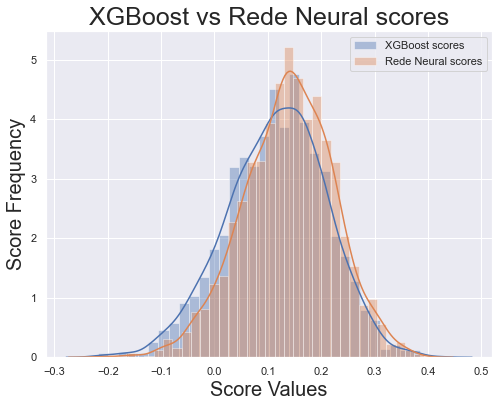

In [21]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

xgboost_nn_comp_scores = [reg1_scores, reg2_scores, 'XGBoost', 'Rede Neural']

plot_score_dist(reg1_scores, reg2_scores, 'XGBoost', 'Rede Neural')

In [22]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.07783283022613686
0.28927708996348794
-0.0373403539695084
0.3009120110223643


# Use Subplots to plot

In [23]:
from utils.utils import plot_all_compares

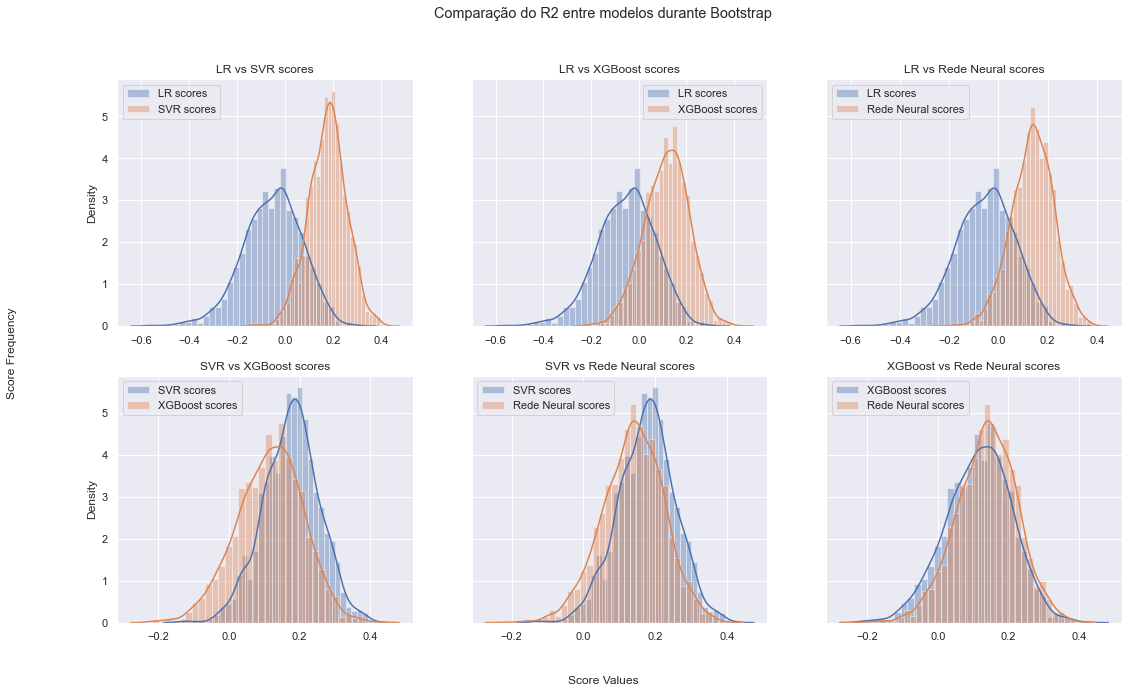

In [24]:
plot_all_compares(
    lr_svr_comp_scores,
    lr_xgboost_comp_scores,
    lr_nn_comp_scores,
    svr_xgboost_comp_scores,
    svr_nn_comp_scores,
    xgboost_nn_comp_scores
)